In [ ]:
!nvidia-smi

Sat Jan 11 01:00:59 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
# cd yolov5
# pip install -r requirements.txt  # install

Cloning into 'yolov5'...
remote: Enumerating objects: 17120, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 17120 (delta 35), reused 16 (delta 12), pack-reused 17056 (from 3)
Receiving objects: 100% (17120/17120), 15.79 MiB | 17.01 MiB/s, done.
Resolving deltas: 100% (11742/11742), done.


In [ ]:
%pwd

'/content'

In [ ]:
cd yolov5

/content/yolov5


In [ ]:
%pwd

'/content/yolov5'

In [ ]:
!pip install -qr requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.8/906.8 kB 23.3 MB/s eta 0:00:00


In [ ]:
from IPython.display import Image, clear_output  # to display images
# from utils.google_utils import gdrive_download  # to download models/datasets
import torch
# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 2.5.1+cu121 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15102MB, multi_processor_count=40, uuid=eae357d2-9414-fff3-834a-e6226e15e894, L2_cache_size=4MB)


In [ ]:
cd ..

/content


In [ ]:
!kaggle datasets download -d jonathanoheix/face-expression-recognition-dataset

Dataset URL: https://www.kaggle.com/datasets/jonathanoheix/face-expression-recognition-dataset
License(s): unknown
 96% 116M/121M [00:01<00:00, 111MB/s]
100% 121M/121M [00:01<00:00, 92.8MB/s]


In [ ]:
!unzip /content/face-expression-recognition-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/validation/fear/8797.jpg  
  inflating: images/validation/fear/8818.jpg  
  inflating: images/validation/fear/886.jpg  
  inflating: images/validation/fear/9037.jpg  
  inflating: images/validation/fear/9040.jpg  
  inflating: images/validation/fear/9101.jpg  
  inflating: images/validation/fear/911.jpg  
  inflating: images/validation/fear/9179.jpg  
  inflating: images/validation/fear/9205.jpg  
  inflating: images/validation/fear/9232.jpg  
  inflating: images/validation/fear/9251.jpg  
  inflating: images/validation/fear/9261.jpg  
  inflating: images/validation/fear/9281.jpg  
  inflating: images/validation/fear/9302.jpg  
  inflating: images/validation/fear/9333.jpg  
  inflating: images/validation/fear/9369.jpg  
  inflating: images/validation/fear/9370.jpg  
  inflating: images/validation/fear/9474.jpg  
  inflating: images/validation/fear/949.jpg  
  inflating: images/validation/fear/9602.jpg  
  inflating:

In [ ]:
import os

# Define the path to the dataset directory
dataset_path = "images/train"  # Adjust this to your dataset folder path

# Get the list of class names (folder names in the validation directory)
class_names = sorted([folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))])

print("Class Names:", class_names)


Class Names: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [ ]:
nc = len(class_names)
nc

7

In [ ]:
%cat yolov5/models/yolov5s.yaml

# Ultralytics YOLOv5 🚀, AGPL-3.0 license

# Parameters
nc: 80 # number of classes
depth_multiple: 0.33 # model depth multiple
width_multiple: 0.50 # layer channel multiple
anchors:
  - [10, 13, 16, 30, 33, 23] # P3/8
  - [30, 61, 62, 45, 59, 119] # P4/16
  - [116, 90, 156, 198, 373, 326] # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [
    [-1, 1, Conv, [64, 6, 2, 2]], # 0-P1/2
    [-1, 1, Conv, [128, 3, 2]], # 1-P2/4
    [-1, 3, C3, [128]],
    [-1, 1, Conv, [256, 3, 2]], # 3-P3/8
    [-1, 6, C3, [256]],
    [-1, 1, Conv, [512, 3, 2]], # 5-P4/16
    [-1, 9, C3, [512]],
    [-1, 1, Conv, [1024, 3, 2]], # 7-P5/32
    [-1, 3, C3, [1024]],
    [-1, 1, SPPF, [1024, 5]], # 9
  ]

# YOLOv5 v6.0 head
head: [
    [-1, 1, Conv, [512, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 6], 1, Concat, [1]], # cat backbone P4
    [-1, 3, C3, [512, False]], # 13

    [-1, 1, Conv, [256, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 4],

In [ ]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [ ]:
%%writetemplate /content/yolov5/models/custom_yolov5.yaml

# Parameters
nc: {nc} # number of classes
depth_multiple: 0.33 # model depth multiple
width_multiple: 0.50 # layer channel multiple
anchors:
  - [10, 13, 16, 30, 33, 23] # P3/8
  - [30, 61, 62, 45, 59, 119] # P4/16
  - [116, 90, 156, 198, 373, 326] # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [
    [-1, 1, Conv, [64, 6, 2, 2]], # 0-P1/2
    [-1, 1, Conv, [128, 3, 2]], # 1-P2/4
    [-1, 3, C3, [128]],
    [-1, 1, Conv, [256, 3, 2]], # 3-P3/8
    [-1, 6, C3, [256]],
    [-1, 1, Conv, [512, 3, 2]], # 5-P4/16
    [-1, 9, C3, [512]],
    [-1, 1, Conv, [1024, 3, 2]], # 7-P5/32
    [-1, 3, C3, [1024]],
    [-1, 1, SPPF, [1024, 5]], # 9
  ]

# YOLOv5 v6.0 head
head: [
    [-1, 1, Conv, [512, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 6], 1, Concat, [1]], # cat backbone P4
    [-1, 3, C3, [512, False]], # 13

    [-1, 1, Conv, [256, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 4], 1, Concat, [1]], # cat backbone P3
    [-1, 3, C3, [256, False]], # 17 (P3/8-small)

    [-1, 1, Conv, [256, 3, 2]],
    [[-1, 14], 1, Concat, [1]], # cat head P4
    [-1, 3, C3, [512, False]], # 20 (P4/16-medium)

    [-1, 1, Conv, [512, 3, 2]],
    [[-1, 10], 1, Concat, [1]], # cat head P5
    [-1, 3, C3, [1024, False]], # 23 (P5/32-large)

    [[17, 20, 23], 1, Detect, [nc, anchors]], # Detect(P3, P4, P5)
  ]



In [ ]:
import os

# Paths to dataset
train_path = "/content/images/train"
val_path = "/content/images/validation"

# Get class names
class_names = sorted(folder for folder in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, folder)))

# Write dataset.yaml
with open("/content/images/dataset.yaml", "w") as f:
    f.write(f"train: {train_path}\n")
    f.write(f"val: {val_path}\n\n")
    f.write(f"nc: {len(class_names)}\n")
    f.write(f"names: {class_names}\n")

print("dataset.yaml created successfully!")


dataset.yaml created successfully!


In [ ]:
# Generate a label
import os

# Define dataset paths
train_dir = "/content/images/train"
val_dir = "/content/images/validation"
label_dirs = [("train", train_dir), ("validation", val_dir)]

# Get class names from folder names
class_names = sorted(os.listdir(train_dir))
class_map = {name: idx for idx, name in enumerate(class_names)}
print("Class Mapping:", class_map)

# Function to create labels
def create_labels(image_dir, label_dir, class_map):
    for class_name, class_id in class_map.items():
        class_path = os.path.join(image_dir, class_name)
        label_path = os.path.join(label_dir, class_name)
        os.makedirs(label_path, exist_ok=True)

        # Process each image
        for img_file in os.listdir(class_path):
            if img_file.endswith((".jpg", ".png", ".jpeg")):
                label_file = os.path.splitext(img_file)[0] + ".txt"
                label_content = f"{class_id} 0.5 0.5 1.0 1.0\n"

                # Save label
                with open(os.path.join(label_path, label_file), "w") as f:
                    f.write(label_content)

# Generate labels for train and val
for label_dir_name, image_dir in label_dirs:
    create_labels(image_dir, f"/content/labels/{label_dir_name}", class_map)

print("Labels generated successfully!")


Class Mapping: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
Labels generated successfully!


## Training

In [ ]:
%%time
%cd /content/yolov5/
!python train.py --img 48 --batch 64 --epochs 10 --data '/content/images/dataset.yaml' --cfg ./models/custom_yolov5.yaml --weights 'yolov5s.pt' --name yolov5s_results --cache

Streaming output truncated to the last 5000 lines.
        4/9     0.344G    0.01804   0.005064    0.05102        200         64:  51% 230/451 [01:06<00:54,  4.05it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
        4/9     0.344G    0.01804   0.005061    0.05102        201         64:  51% 231/451 [01:06<00:52,  4.18it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
        4/9     0.344G    0.01803   0.005057    0.05102        199         64:  51% 232/451 [01:07<00:44,  4.91it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
        4/9     0.344G    0.018

## Evaluation

In [ ]:
# load tensorboard and save the logs in run
%load_ext tensorboard
%tensorboard --logdir runs

<IPython.core.display.Javascript object>

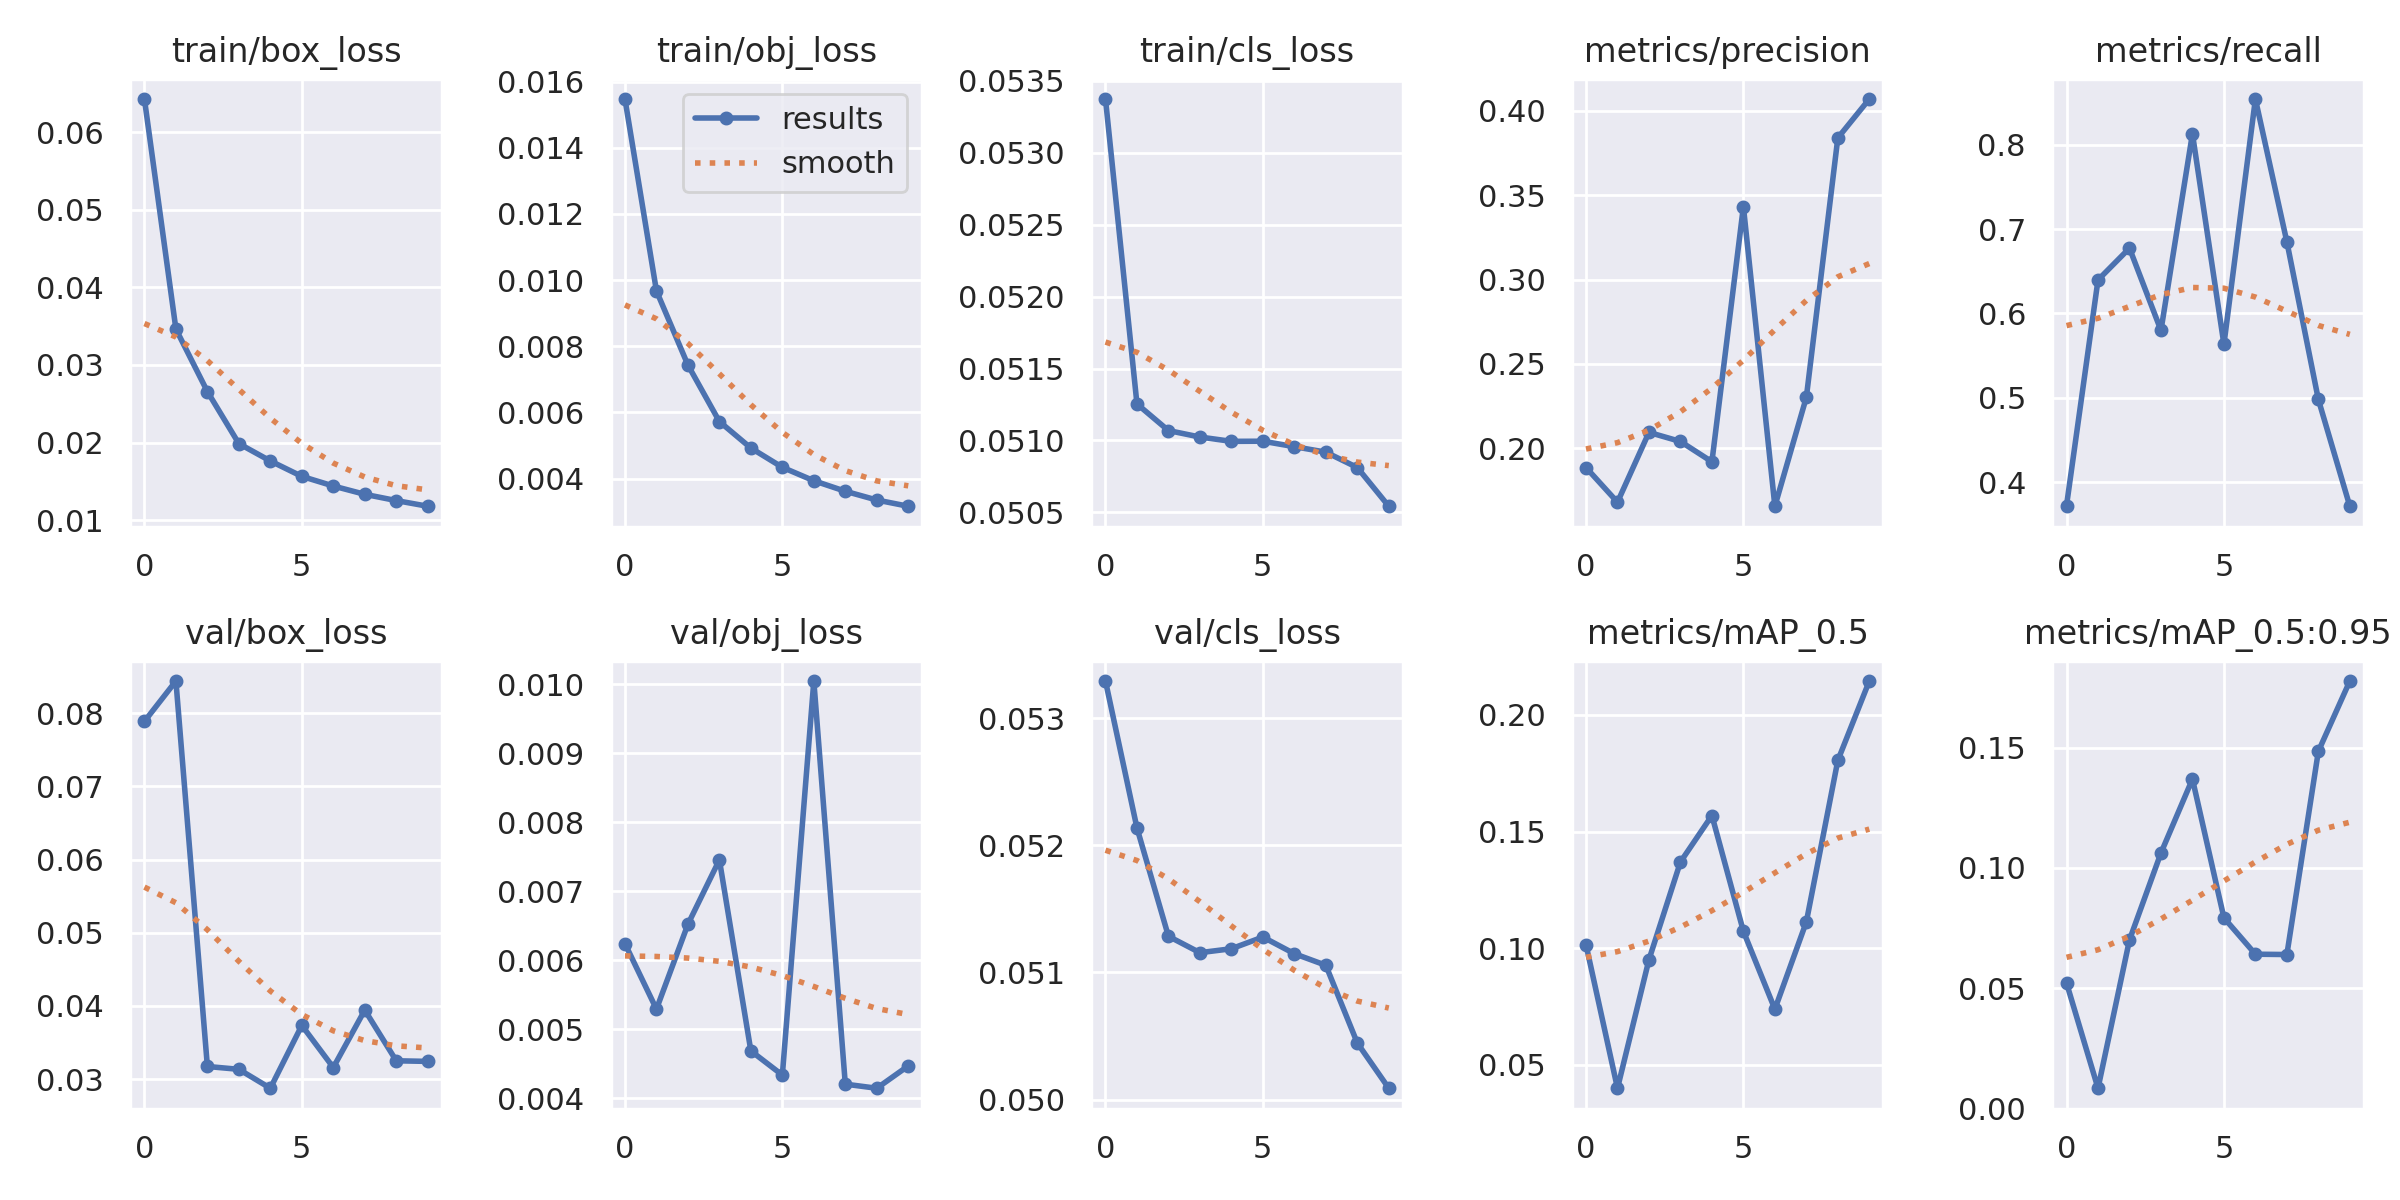

In [ ]:
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='/content/yolov5/runs/train/yolov5s_results/results.png', width=1000)

GROUND TRUTH TRAINING DATA:


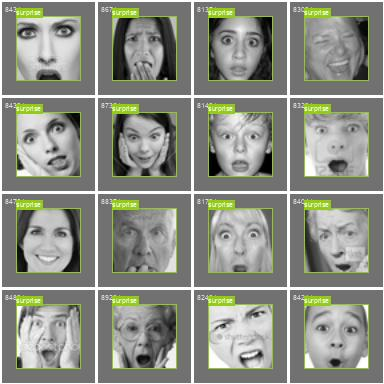

In [ ]:
print("GROUND TRUTH TRAINING DATA:")
Image(filename='/content/yolov5/runs/train/yolov5s_results/val_batch0_labels.jpg', width=900)

GROUND TRUTH AUGMENTED TRAINING DATA:


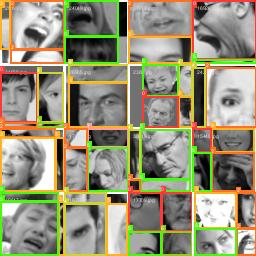

In [ ]:
print("GROUND TRUTH AUGMENTED TRAINING DATA:")
Image(filename='/content/yolov5/runs/train/yolov5s_results/train_batch0.jpg', width=900)

In [ ]:
%ls runs/train/yolov5s_results/weights

best.pt  last.pt


In [ ]:
%pwd

'/content/yolov5'

In [ ]:
import os
import shutil

validation_dir = "/content/images/validation"
output_dir = "/content/images/validation_flattened"

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Move images from subfolders to the main directory
for folder in os.listdir(validation_dir):
    folder_path = os.path.join(validation_dir, folder)
    if os.path.isdir(folder_path):  # Check if it's a directory
        for file in os.listdir(folder_path):
            if file.endswith(('bmp', 'dng', 'jpeg', 'jpg', 'png', 'tif', 'tiff', 'webp', 'pfm')):
                source = os.path.join(folder_path, file)
                destination = os.path.join(output_dir, file)
                shutil.move(source, destination)

print(f"Flattened images saved in {output_dir}")


Flattened images saved in /content/images/validation_flattened


In [ ]:
# use the best weights!
%cd /content/yolov5/
!python detect.py --weights /content/yolov5/runs/train/yolov5s_results/weights/best.pt --img 48 --conf 0.5 --source ../images/validation_flattened

Streaming output truncated to the last 5000 lines.
image 2069/7066 /content/images/validation_flattened/19571.jpg: 64x64 (no detections), 5.1ms
image 2070/7066 /content/images/validation_flattened/19578.jpg: 64x64 (no detections), 5.1ms
image 2071/7066 /content/images/validation_flattened/19581.jpg: 64x64 (no detections), 5.1ms
image 2072/7066 /content/images/validation_flattened/19589.jpg: 64x64 (no detections), 5.1ms
image 2073/7066 /content/images/validation_flattened/19590.jpg: 64x64 (no detections), 5.1ms
image 2074/7066 /content/images/validation_flattened/19591.jpg: 64x64 (no detections), 5.1ms
image 2075/7066 /content/images/validation_flattened/19594.jpg: 64x64 1 surprise, 5.1ms
image 2076/7066 /content/images/validation_flattened/19597.jpg: 64x64 (no detections), 5.1ms
image 2077/7066 /content/images/validation_flattened/19599.jpg: 64x64 (no detections), 5.2ms
image 2078/7066 /content/images/validation_flattened/196.jpg: 64x64 (no detections), 5.9ms
image 2079/7066 /content/i

In [ ]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

## Getting the trained model

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

ValueError: mount failed

In [ ]:
%cp /content/yolov5/runs/train/yolov5s_results/weights/best.pt /content/gdrive/MyDrive/face_detection
